# Importar librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar Datos

In [2]:
preprocessed_penguins_df = sns.load_dataset("titanic")
preprocessed_penguins_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# Validación de datos

## ¿Qué tipo de dato tienen las variables del dataset?

In [3]:
preprocessed_penguins_df.dtypes

,0
survived,int64
pclass,int64
sex,object
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,object
class,category
who,object


## ¿Cuántas variables de cada tipo tenemos en el dataset?

In [4]:
preprocessed_penguins_df.dtypes.value_counts()

,count
object,5
int64,4
float64,2
bool,2
category,1
category,1


## ¿Cuántas variables y observaciones tenemos en el dataset?

In [5]:
preprocessed_penguins_df.shape

(891, 15)

# Validación de datos nulos

## ¿Existen valores nulos en el dataset?

In [6]:
preprocessed_penguins_df.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## ¿Qué variables tienen datos nulos?

In [7]:
preprocessed_penguins_df.isnull().any()

,0
survived,False
pclass,False
sex,False
age,True
sibsp,False
parch,False
fare,False
embarked,True
class,False
who,False


# ¿Cuántos valores nulos tenemos por variable?

In [8]:
preprocessed_penguins_df.isnull().sum().sort_values(ascending=False)

,0
deck,688
age,177
embarked,2
embark_town,2
survived,0
pclass,0
sex,0
sibsp,0
parch,0
fare,0


## ¿Cuántos valores nulos tenemos en total?

In [9]:
preprocessed_penguins_df.isnull().sum().sum()

869

## ¿Cuál es la proporción de valores nulos por cada variable?

In [10]:
preprocessed_penguins_df.isnull().melt(value_name="missing")

,variable,missing
0,survived,False
1,survived,False
2,survived,False
3,survived,False
4,survived,False
...,...,...
13360,alone,False
13361,alone,False
13362,alone,False
13363,alone,False


## Graficamos la proporcion de los valores nulos

In [11]:
penguins_null_df = preprocessed_penguins_df.isnull().melt(value_name="missing")
penguins_null_df

,variable,missing
0,survived,False
1,survived,False
2,survived,False
3,survived,False
4,survived,False
...,...,...
13360,alone,False
13361,alone,False
13362,alone,False
13363,alone,False


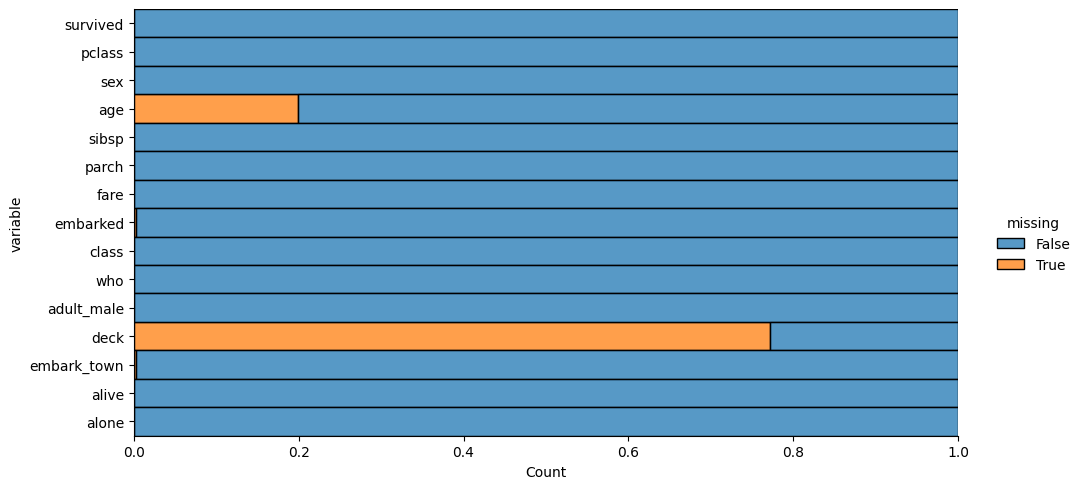

In [12]:
sns.displot(
    data=penguins_null_df,
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2
)
plt.show()

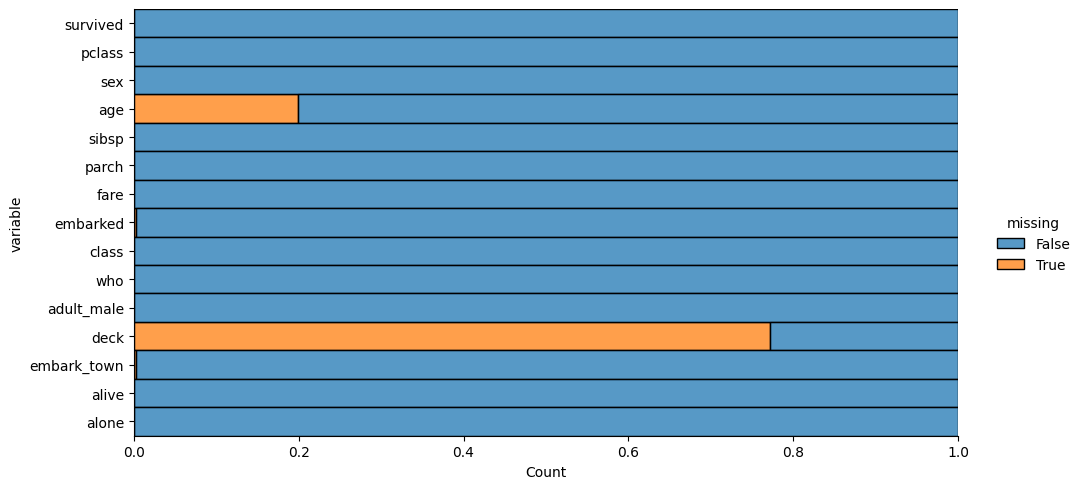

In [13]:
(
    preprocessed_penguins_df
      .isnull()
      .melt(value_name="missing")
      .pipe(
          lambda df:
            sns.displot(
              data=df,
              y="variable",
              hue="missing",
              multiple="fill",
              aspect=2
         )
      )
)

plt.show()

## ¿Cómo ver los valores nulos en todo el dataset?

In [14]:
(
  preprocessed_penguins_df
    .isnull()
    .any(axis=1)
)

,0
0,True
1,False
2,True
3,False
4,True
...,...
886,True
887,False
888,True
889,False


In [15]:
(
    preprocessed_penguins_df[
        preprocessed_penguins_df
          .isnull()
          .any(axis=1)
    ]
)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


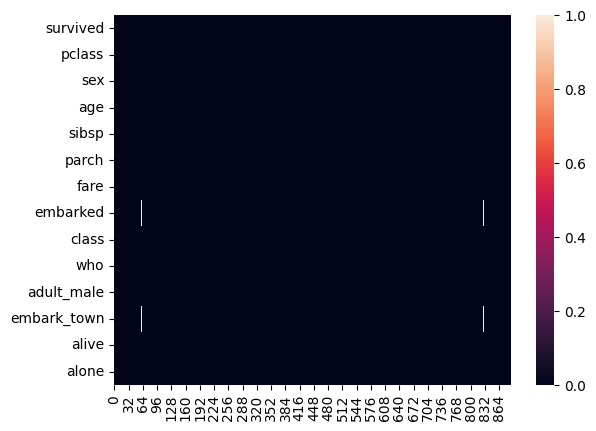

In [32]:
(
    preprocessed_penguins_df
    .isnull()
    .transpose()
    .pipe(
        lambda df:
          sns.heatmap(
              data=df
          )
    )
)
plt.show()

## ¿Cuántos registros me quedarían si elimino los nulos?

In [17]:
preprocessed_penguins_df.shape

(891, 15)

In [18]:
preprocessed_penguins_df_nulls = preprocessed_penguins_df.dropna()
preprocessed_penguins_df_nulls.shape

(182, 15)

## Imputación de datos

In [ ]:
preprocessed_titanic_df = preprocessed_penguins_df
preprocessed_titanic_df

In [ ]:
preprocessed_titanic_df["age"].fillna(preprocessed_titanic_df["age"].mean(), inplace=True)

In [27]:
preprocessed_titanic_df.fillna({"age":preprocessed_titanic_df["age"].mean()}, inplace=True)

In [ ]:
preprocessed_titanic_df

## Eliminar columna

In [31]:
preprocessed_penguins_df.drop(columns=["deck"], inplace=True)